In [68]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Twitter API Keys


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [69]:
#This analysis helps you to find the "locations" that Twitter has trending topic information for. 
#The response is an array of "locations" that encode the location's WOEID 
#A WOEID is a Yahoo:" Where On Earth ID"
#comment out #api.trends_available() to see the results


#api.trends_available()

In [70]:
#To find the closet trendy hashtags in any city, type the lon & lat, example below Lon&Lat for San Francisco
api.trends_closest(37.77, -122.41)

#Analysis and how to find the closet trends:
#Go to http://woeid.rosselliot.co.nz/ 
#Type in "Search Place": San Francisco
#Then find the woeid#: 2487956 to know where the most hastags trends in San Francisco

#This analysis helps you know where exactly the most active tags/accounts in City in case you need to start a promotion or target consumers or for political reasons


[{'name': 'San Francisco',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2487956',
  'parentid': 23424977,
  'country': 'United States',
  'woeid': 2487956,
  'countryCode': 'US'}]

In [71]:
#To see What is the most active hashtags in San Francisco, you can type the code below + the woeid
api.trends_place(23424977)

#Analysis:
# Trends name shows the most active tags in San Francisco by url, query, tweet_volume

[{'trends': [{'name': 'Randall Cobb',
    'url': 'http://twitter.com/search?q=%22Randall+Cobb%22',
    'promoted_content': None,
    'query': '%22Randall+Cobb%22',
    'tweet_volume': 15587},
   {'name': '#DisneyVillainsAndColourPop',
    'url': 'http://twitter.com/search?q=%23DisneyVillainsAndColourPop',
    'promoted_content': None,
    'query': '%23DisneyVillainsAndColourPop',
    'tweet_volume': None},
   {'name': '#Stadia',
    'url': 'http://twitter.com/search?q=%23Stadia',
    'promoted_content': None,
    'query': '%23Stadia',
    'tweet_volume': 68540},
   {'name': 'Sirota',
    'url': 'http://twitter.com/search?q=Sirota',
    'promoted_content': None,
    'query': 'Sirota',
    'tweet_volume': 25529},
   {'name': '#BumblebeeSweepstakes',
    'url': 'http://twitter.com/search?q=%23BumblebeeSweepstakes',
    'promoted_content': None,
    'query': '%23BumblebeeSweepstakes',
    'tweet_volume': 15201},
   {'name': 'Robocop',
    'url': 'http://twitter.com/search?q=Robocop',
    '

In [76]:
#loop inside the most active tags by tweet volume
active_tweets = api.trends_place(23424977)
for tweet_volume in active_tweets:

    # Utilize JSON dumps to generate a pretty-printed json
    print(json.dumps(tweet_volume, sort_keys=True, indent=4, separators=(',', ': ')))


{
    "as_of": "2019-03-19T23:02:04Z",
    "created_at": "2019-03-19T22:59:41Z",
    "locations": [
        {
            "name": "United States",
            "woeid": 23424977
        }
    ],
    "trends": [
        {
            "name": "Randall Cobb",
            "promoted_content": null,
            "query": "%22Randall+Cobb%22",
            "tweet_volume": 16466,
            "url": "http://twitter.com/search?q=%22Randall+Cobb%22"
        },
        {
            "name": "#DisneyVillainsAndColourPop",
            "promoted_content": null,
            "query": "%23DisneyVillainsAndColourPop",
            "tweet_volume": null,
            "url": "http://twitter.com/search?q=%23DisneyVillainsAndColourPop"
        },
        {
            "name": "#Stadia",
            "promoted_content": null,
            "query": "%23Stadia",
            "tweet_volume": 69755,
            "url": "http://twitter.com/search?q=%23Stadia"
        },
        {
            "name": "Sirota",
            "p

In [77]:
#To target a user or a tag and analyse it
target_term = "Randall Cobb"

# Search for most recent tweet directed to the account
public_tweets = api.search(target_term, count=100, result_type="recent")

# Extract all hashtags from tweets directed to the account
for tweet in public_tweets["statuses"]:

    # Print tweet in JSON
    #print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))

    # Print tweet text
    print(tweet["text"])

    # Loop through all hashtags and print each one included
    #for hashtag in tweet["entities"]["hashtags"]:
        #print(hashtag["text"])





RT @NFLonFOX: Updated look at the @dallascowboys offense:
- QB: Dak Prescott 
- HB: Ezekiel Elliott
- WR: Amari Cooper
- WR: Randall Cobb…
RT @dallascowboys: The #DallasCowboys have agreed to terms with wide receiver Randall Cobb on a one-year deal.

MORE → https://t.co/aGVLrio…
RT @BR_NFL: Randall Cobb has agreed to a deal with the Cowboys, per @JayGlazer https://t.co/TRrb8hLbX7
RT @AdamSchefter: Cowboys’ depth chart now will include five WRs not on their roster at this time last year:

*Randall Cobb
*Amari Cooper
*…
RT @jonmachota: Dallas Cowboys’ projected Week 1 starters:

QB: Dak Prescott
RB: Ezekiel Elliott
WR: Amari Cooper
WR: Randall Cobb
WR: Mich…
What are my boys going to do #greenbay #packers #cheeseheads Randall Cobb to the #cowboys #mrbailout #gone
Randall Cobb to the cowboys... oh boy
RT @jonmachota: Dallas Cowboys’ projected Week 1 starters:

QB: Dak Prescott
RB: Ezekiel Elliott
WR: Amari Cooper
WR: Randall Cobb
WR: Mich…
RT @BR_NFL: Randall Cobb has agreed to a deal wit

In [79]:
#To analyse the length of time of hastags activity
# let's consider the top 4 tags
target_tags = ["Randall Cobb", "Stadia", "BumblebeeSweepstakes", "NATO" ]
time_between_tweets = []

# Loop through each hashtag
for tag in target_tags: 
    
    # Create array to record all date-times of tweets
    tweet_times = []

    # Get 100 tweets on targetted tag
    public_tweets = api.search(tag, rpp=100)
    print(tag)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
    
    # Convert all tweet times into datetime objects
    tweet_time_objects = []

    # Add each datetime object into the array
    for x in range(len(tweet_times)):
        tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
        tweet_time_objects.append(tweet_datetime)

    # Calculate the time between tweets
    time_in_between = []

    # Calculate the time in between each tweet
    for x in range(len(tweet_time_objects)-1):
        secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) 
        time_in_between.append(secs_apart)

    # Seconds Between Tweets
    print("Avg. Seconds Between Tweets: %s" % np.mean(time_in_between))
    print("")

Randall Cobb
Avg. Seconds Between Tweets: 0.7

Stadia
Avg. Seconds Between Tweets: 0.18181818181818182

BumblebeeSweepstakes
Avg. Seconds Between Tweets: 1.9285714285714286

NATO
Avg. Seconds Between Tweets: 1.7142857142857142



In [ ]:
#Analysis of the activity above:
#The most active #hastag between the 4 most trending and popular hastags
#stadia: every 0.18 second, there is someone tweeting and using this hastag


In [66]:
#Top 10 accounts tweeting under these hashtags
#Later

In [81]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [82]:
# Let's consider the target user Account below is the active user who tweet under a target hastag for us
#below is a sentiment analysis of these users 
target_user = ("@DalaiLama", "@realdonaldtrump", "@katyperry")


In [83]:
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 1 pages of tweets (total 200 tweets)
    for x in range(10):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Print the Averages
    print("")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(positive_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))



User: @DalaiLama
Compound: 0.19505000000000003
Positive: 0.19505000000000003
Neutral: 0.7293000000000001
Negative: 0.0757

User: @realdonaldtrump
Compound: 0.0894
Positive: 0.0894
Neutral: 0.8474499999999999
Negative: 0.06315

User: @katyperry
Compound: 0.13604999999999998
Positive: 0.13604999999999998
Neutral: 0.84065
Negative: 0.02335


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [89]:
# # Counter
counter = 1

# Variables for holding sentiments
sentiments = []
target_user1 = ("@realdonaldtrump")
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page = x)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweet Number": counter})
        
        # Add to counter 
        counter = counter + 1


In [90]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Number
0,0.0000,Tue Jan 29 22:51:15 +0000 2019,1.000,0.0,0.000,1
1,0.7269,Sat Jan 26 08:25:03 +0000 2019,0.621,0.0,0.379,2
2,0.0000,Sat Aug 11 08:08:19 +0000 2018,1.000,0.0,0.000,3
3,0.0000,Fri May 04 12:06:09 +0000 2018,1.000,0.0,0.000,4
4,0.0000,Sat Apr 14 18:53:31 +0000 2018,1.000,0.0,0.000,5


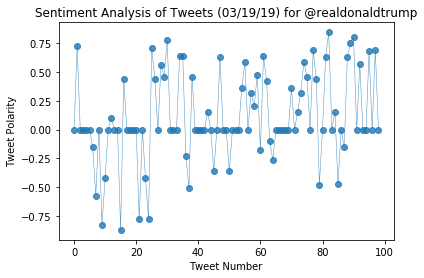

In [91]:
 # Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user1))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweet Number")
plt.show()

In [92]:
# List to hold sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Grab 25 tweets
public_tweets = api.search(target_user1, count=1, result_type="recent")

# Loop through all tweets
for tweet in public_tweets["statuses"]:

    # Run Vader Analysis on each tweet
    compound = analyzer.polarity_scores(tweet["text"])["compound"]
    pos = analyzer.polarity_scores(tweet["text"])["pos"]
    neu = analyzer.polarity_scores(tweet["text"])["neu"]
    neg = analyzer.polarity_scores(tweet["text"])["neg"]

    # Add each value to the appropriate array
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)

# Store the Average Sentiments
sentiment = {"Compound": np.mean(compound_list),
             "Positive": np.mean(positive_list),
             "Neutral": np.mean(negative_list),
             "Negative": np.mean(neutral_list)}

# Print the Sentiments
print(sentiment)
print("")


{'Compound': 0.0, 'Positive': 0.0, 'Neutral': 0.0, 'Negative': 1.0}



In [15]:
from __future__ import print_function
import tweepy
import json
from pymongo import MongoClient

In [16]:
# assuming you have mongoDB installed locally
# and a database called 'twitterdb'
MONGO_HOST= 'mongodb://localhost/twitterdb'  

In [17]:
WORDS = ['#bigdata', '#AI', '#datascience', '#machinelearning', '#ml', '#iot']


In [18]:
class StreamListener(tweepy.StreamListener):    
    #This is a class provided by tweepy to access the Twitter Streaming API. 
 
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
 
    def on_data(self, data):
        #This is the meat of the script...it connects to your mongoDB and stores the tweet
        try:
            client = MongoClient(MONGO_HOST)
            
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitterdb
    
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            
            #grab the 'created_at' data from the Tweet to use for display
            created_at = datajson['created_at']
 
            #print out a message to the screen that we have collected a tweet
            print("Tweet collected at " + str(created_at))
            
            #insert the data into the mongoDB into a collection called twitter_search
            #if twitter_search doesn't exist, it will be created.
            db.twitter_search.insert(datajson)
        except Exception as e:
           print(e)

In [ ]:

#Set up the listener. The 'wait_on_rate_limit=True' is needed to help with Twitter API rate limiting.
listener = StreamListener(api=tweepy.API(wait_on_rate_limit=True)) 
streamer = tweepy.Stream(auth=auth, listener=listener)
#print("Tracking: " + str(WORDS))
#streamer.filter(track=WORDS)

In [ ]:
from bs4 import BeautifulSoup
import requests
import pymongo

In [ ]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [ ]:
# Define database and collection
db = client.nhl_db
collection = db.articles

In [ ]:
# URL of page to be scraped
url = 'https://twitter.com/search-home'

# Retrieve page with the requests module
response = requests.get(url)
# Create BeautifulSoup object; parse with 'lxml'
soup = BeautifulSoup(response.text, 'lxml')